PROYECTO FINAL - DANIEL OLIVERA

1 - OBJETIVO:
* Utilizar datasets 

VARIABLES (PREDICTORES)

    * OAR   (Outline Aspect Ratio)--------->Relación de aspecto del contorno de la cara
    * LBAR  (Left eyeBrow Aspect Ratio)---->Relación de aspecto de la ceja izquierda
    * RBAR  (Right eyeBrow Aspect Ratio)--->Relación de aspecto de la ceja derecha
    * NUAR  (Nose Up Aspect Ratio)--------->Relación de aspecto de la parte superior de la nariz
    * NDAR  (Nose Down Aspect Ratio)------->Relación de aspecto de la parte baja de la nariz
    * LEAR  (Left Eye Aspect Ratio)-------->Relación de aspecto del ojo izquierdo
    * REAR  (Right Eye Aspect Ratio)------->Relación de aspecto del ojo derecho
    * OLAR  (Out Lips Aspect Ratio)-------->Relación de aspecto del contorno externo de los labios
    * ILAR  (In Lips Aspect Ratio)--------->Relación de aspecto del contorno interno de los labios

In [37]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

2 - Análisis exploratorio de datos - eda

In [2]:
neutral = pd.read_csv('D:\MCD709\data\\0_709_neutral.csv')
surprise = pd.read_csv('D:\MCD709\data\\1_709_surprise.csv')
angry = pd.read_csv('D:\MCD709\data\\2_709_angry.csv')

In [3]:
df = [neutral, surprise, angry]
df = pd.concat(df)
df = df.sample(frac=1, random_state=15193).reset_index()
df = df.drop('index', axis=1)
df.head()

,OAR,LBAR,RBAR,NUAR,NDAR,LEAR,REAR,OLAR,ILAR,TAG
0,0.1487,0.3414,0.3684,1.2361,1.9401,0.2853,0.2729,0.4634,0.1567,0.0
1,0.1521,0.2811,0.2867,1.2483,2.0121,0.3341,0.3718,0.3505,0.0228,0.0
2,0.1442,0.6077,0.6045,1.5954,1.8715,0.2972,0.3115,0.1442,0.3459,1.0
3,0.1318,0.3357,0.2962,1.2993,2.1171,0.2256,0.2682,0.3661,0.0915,0.0
4,0.1424,0.5419,0.5724,1.5675,1.9397,0.2680,0.2946,0.1424,0.2039,1.0


In [4]:
#happy = pd.read_csv('D:\MCD709\data\\3_709_happy.csv')
#sad = pd.read_csv('D:\MCD709\data\\4_709_sad.csv')
#fear = pd.read_csv('D:\MCD709\data\\5_709_fear.csv')
#disgust = pd.read_csv('D:\MCD709\data\\6_709_disgust.csv')

In [5]:
print("El df tiene: {} filas y {} columnas".format(df.shape[0], df.shape[1]))
print(df.describe())

El df tiene: 40929 filas y 10 columnas
                OAR          LBAR          RBAR          NUAR          NDAR  \
count  40929.000000  40929.000000  40929.000000  40929.000000  40929.000000   
mean       0.135577      0.439757      0.453138      1.445594      1.913913   
std        0.007304      0.084997      0.084910      0.111217      0.077926   
min        0.117600      0.233100      0.229800      1.122800      1.664100   
25%        0.128800      0.369200      0.385800      1.355800      1.857700   
50%        0.133200      0.419700      0.435200      1.443800      1.906600   
75%        0.142400      0.516300      0.532800      1.524100      1.956900   
max        0.167200      0.759400      0.756600      2.280400      2.295900   

               LEAR          REAR          OLAR          ILAR           TAG  
count  40929.000000  40929.000000  40929.000000  40929.000000  40929.000000  
mean       0.266747      0.277838      0.190616      0.112041      0.810061  
std        0.04

In [6]:
df['TAG'] = df['TAG'].astype(int)
print(df.dtypes,'\n')
valores_nulos = df.isnull().sum()
print("Cantidad de valores nulos por columna:")
print(valores_nulos)
total_valores_nulos_train = valores_nulos.sum()
if total_valores_nulos_train > 0:
    print(f"Total de valores nulos en el DataFrame: {total_valores_nulos_train}")
else:
    print("No existen valores nulos en el DataFrame.")

OAR     float64
LBAR    float64
RBAR    float64
NUAR    float64
NDAR    float64
LEAR    float64
REAR    float64
OLAR    float64
ILAR    float64
TAG       int32
dtype: object 

Cantidad de valores nulos por columna:
OAR     0
LBAR    0
RBAR    0
NUAR    0
NDAR    0
LEAR    0
REAR    0
OLAR    0
ILAR    0
TAG     0
dtype: int64
No existen valores nulos en el DataFrame.


In [7]:
def plot_correlation_heatmap(dataframe):
    corr_matrix = dataframe.corr()
    plt.figure(figsize=(7, 6))
    ax = sns.heatmap(corr_matrix, annot=True, fmt='.0%', cmap="gist_heat_r")
    plt.show()

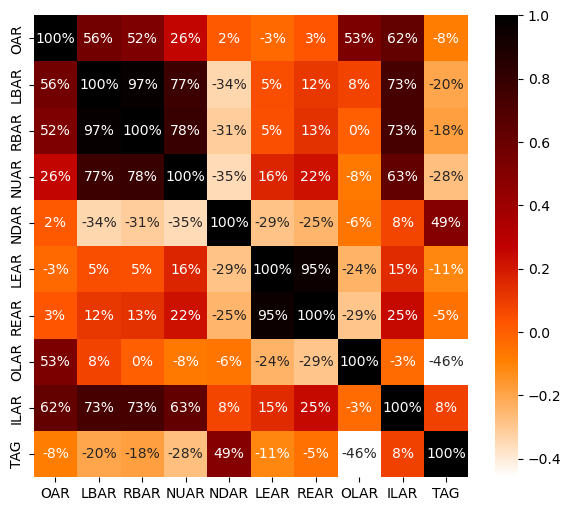

In [8]:
plot_correlation_heatmap(df)

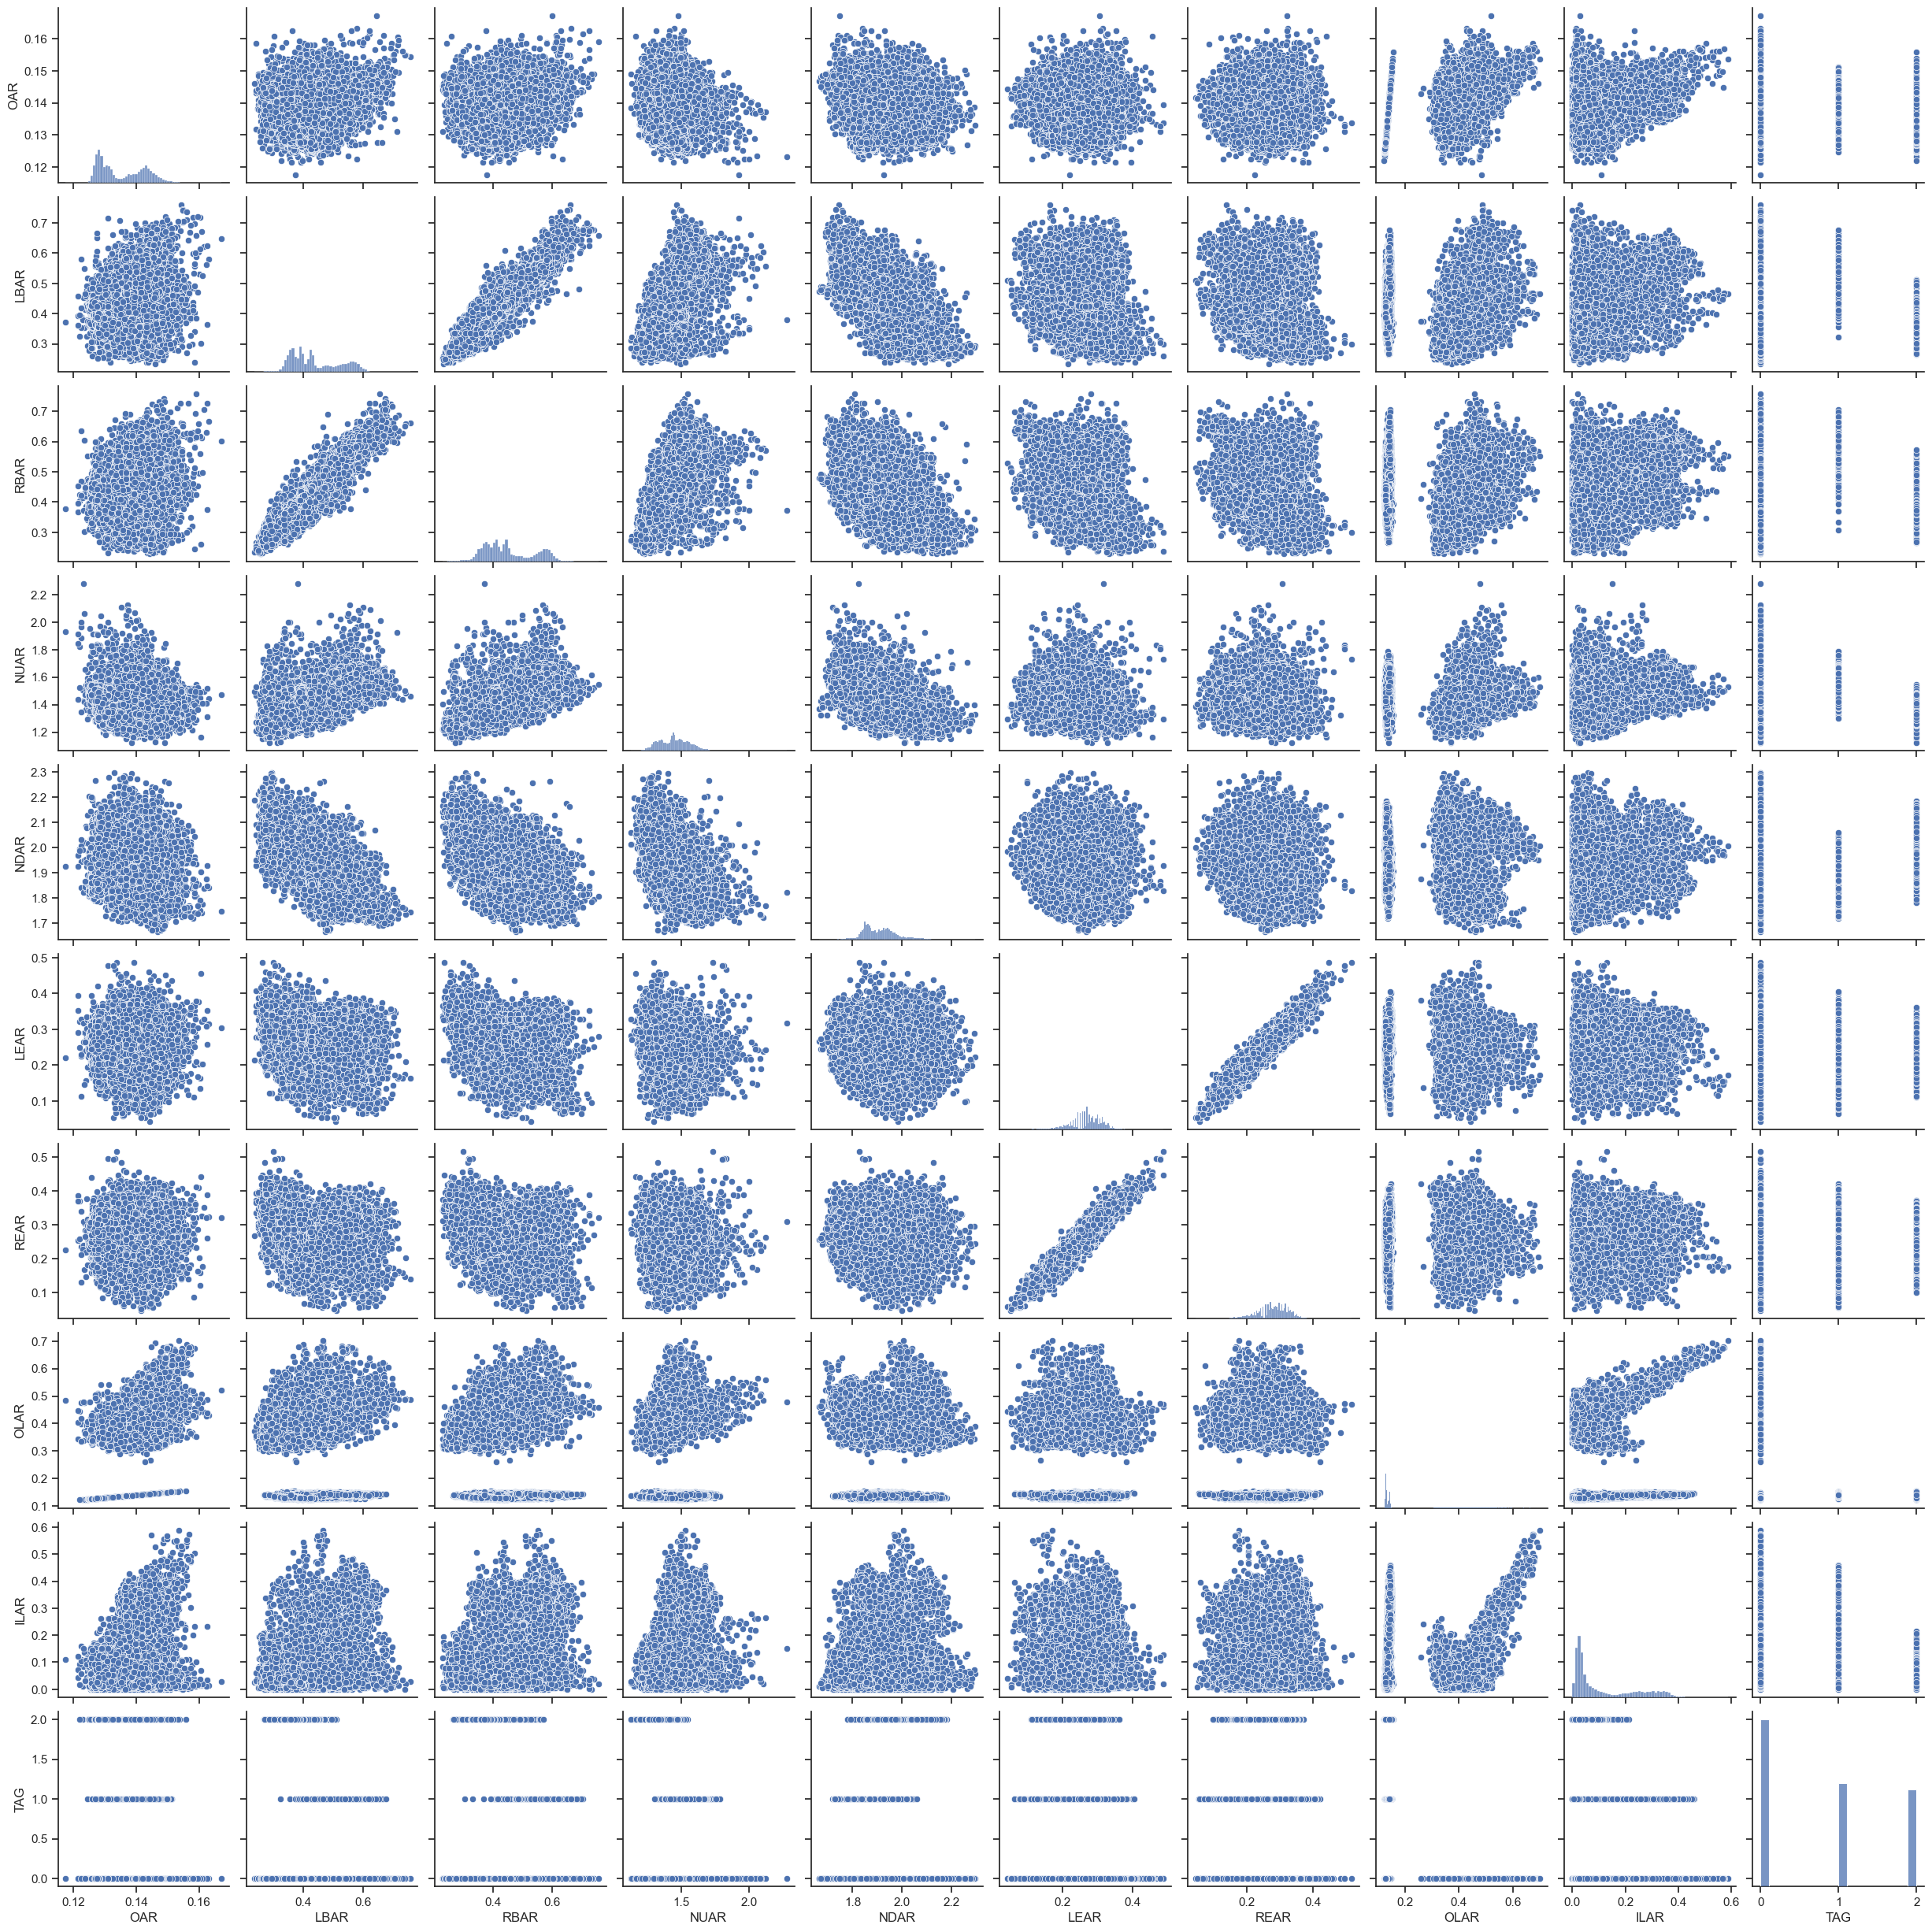

In [9]:
sns.set(style = "ticks")
sns.pairplot(df)

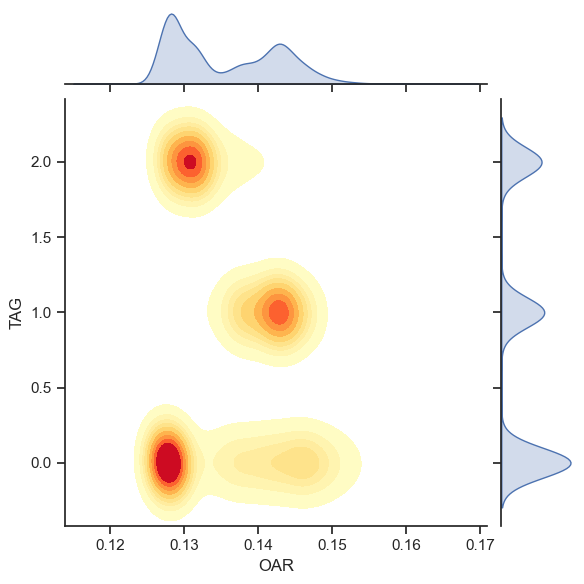

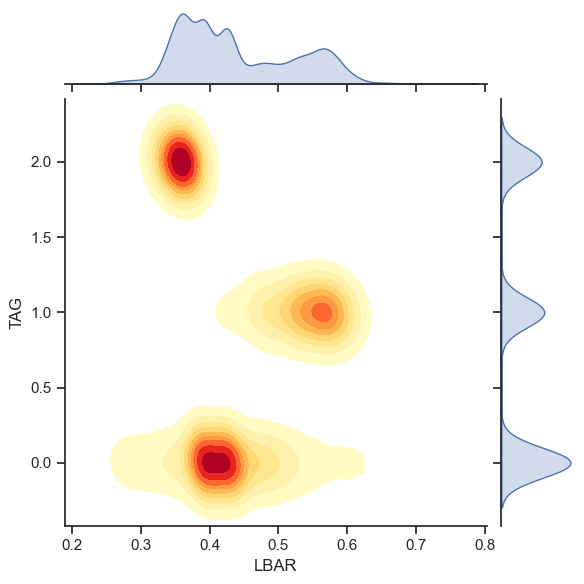

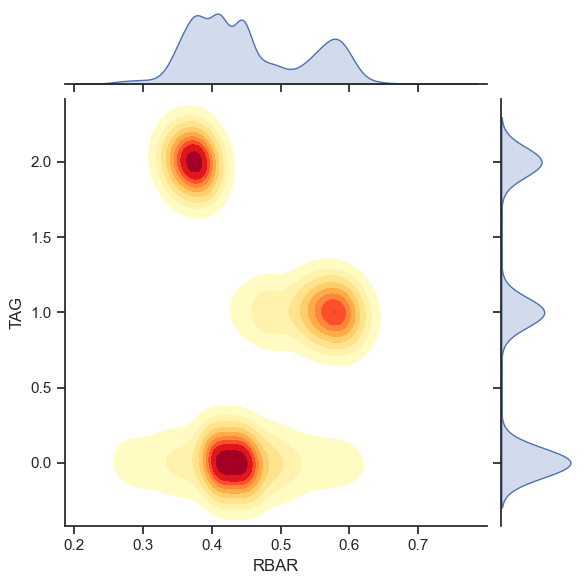

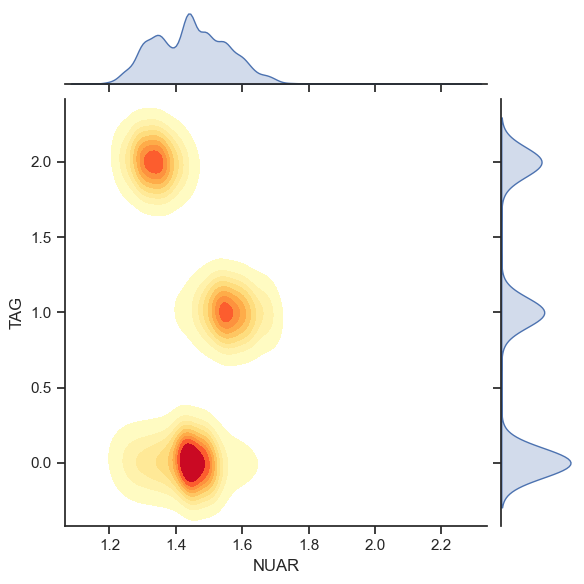

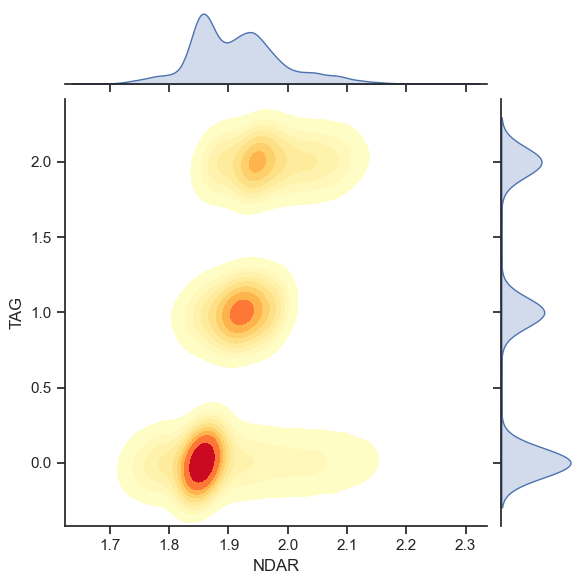

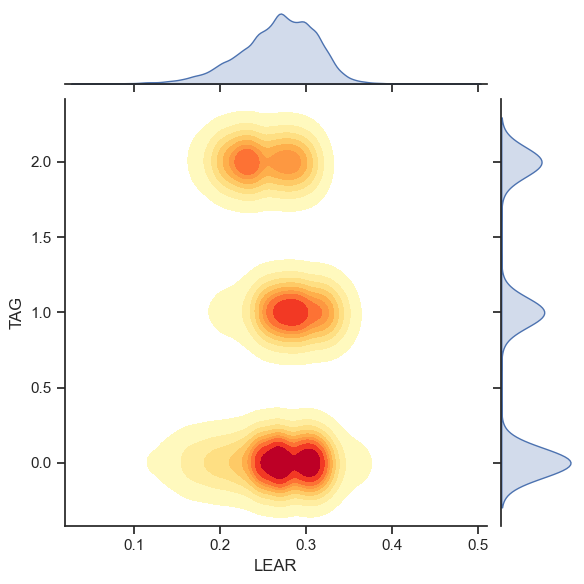

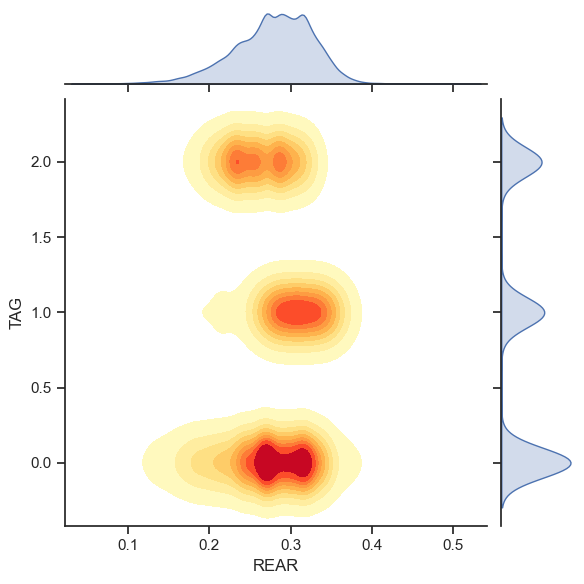

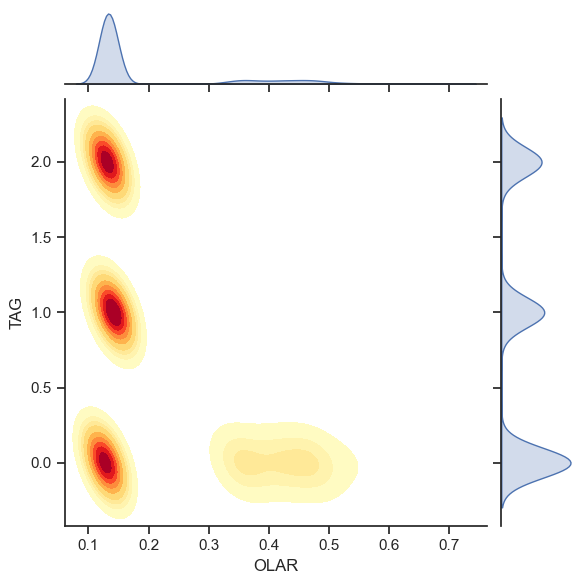

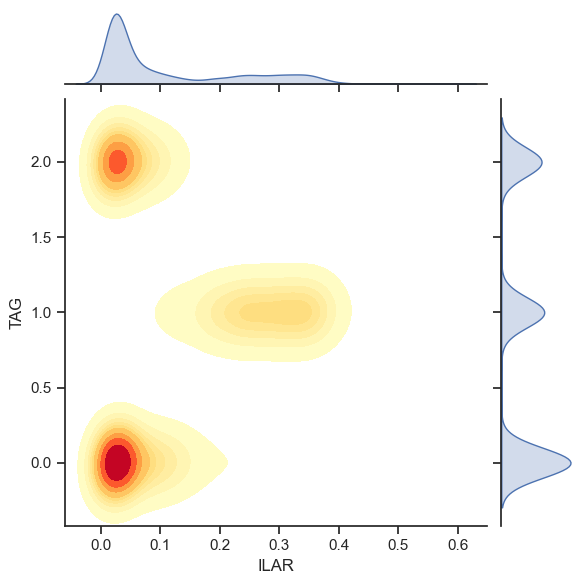

In [10]:
def plot_jointplot(df, y_col, columns, kinds):
    for column in columns:
        sns.jointplot(data=df, x=column, y=y_col, kind=kinds, cmap='YlOrRd', fill=True)
        plt.xlabel(column)
        plt.ylabel(y_col)
        plt.show()

columnas = df.iloc[:, :-1].columns
plot_jointplot(df, 'TAG', columnas, 'kde')

*3 - MODELOS

In [11]:
#def standardize(df):
#    scaler_std = StandardScaler()
#    df_standardized = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)
#    return df_standardized, scaler_std

In [12]:
#tag = df.iloc[:, -1]
#df_std = standardize(df.iloc[:, :-1])[0]
#scaler_std = standardize(df.iloc[:, :-1])[1]
#df = pd.concat([df_std, tag], axis=1)
df.head()

,OAR,LBAR,RBAR,NUAR,NDAR,LEAR,REAR,OLAR,ILAR,TAG
0,0.1487,0.3414,0.3684,1.2361,1.9401,0.2853,0.2729,0.4634,0.1567,0
1,0.1521,0.2811,0.2867,1.2483,2.0121,0.3341,0.3718,0.3505,0.0228,0
2,0.1442,0.6077,0.6045,1.5954,1.8715,0.2972,0.3115,0.1442,0.3459,1
3,0.1318,0.3357,0.2962,1.2993,2.1171,0.2256,0.2682,0.3661,0.0915,0
4,0.1424,0.5419,0.5724,1.5675,1.9397,0.2680,0.2946,0.1424,0.2039,1


In [13]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15193)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=15193)

In [15]:
print("Cantidad de elementos en X:", len(X))
print("Cantidad de elementos en X_train:", len(X_train))
print("Cantidad de elementos en X_val:", len(X_val))
print("Cantidad de elementos en X_test:", len(X_test))

Cantidad de elementos en X: 40929
Cantidad de elementos en X_train: 24557
Cantidad de elementos en X_val: 8186
Cantidad de elementos en X_test: 8186


In [16]:
def logistic_regression(X_train, y_train, X_test, y_test):
    logistic_regression_model = LogisticRegression(solver='liblinear', random_state=15193)
    logistic_regression_model.fit(X_train, y_train)
    y_pred = logistic_regression_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    precision_percentage = accuracy * 100

    results = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": confusion,
        "classification_report": report,
        "precision_percentage": precision_percentage
    }

    return logistic_regression_model, results


In [21]:
def logistic_regression_multinomial(X_train, y_train, X_test, y_test):
    logistic_regression_model = LogisticRegression(multi_class='multinomial', max_iter=1000,random_state=15193)
    logistic_regression_model.fit(X_train, y_train)
    y_pred = logistic_regression_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    precision_percentage = accuracy * 100

    results = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": confusion,
        "classification_report": report,
        "precision_percentage": precision_percentage
    }

    return logistic_regression_model, results

In [25]:
def naive_bayes(X_train, y_train, X_test, y_test):
    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(X_train, y_train)
    y_pred = naive_bayes_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    precision_percentage = accuracy * 100

    results = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": confusion,
        "classification_report": report,
        "precision_percentage": precision_percentage
    }

    return naive_bayes_model, results

In [32]:
def naive_bayes_multinomial(X_train, y_train, X_test, y_test):
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(X_train, y_train)
    y_pred = naive_bayes_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',  zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted',  zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted',  zero_division=1)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    precision_percentage = accuracy * 100

    results = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": confusion,
        "classification_report": report,
        "precision_percentage": precision_percentage
    }

    return naive_bayes_model, results

In [35]:
def knn_classification(X_train, y_train, X_test, y_test, n_neighbors=5):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    precision_percentage = accuracy * 100

    results = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": confusion,
        "classification_report": report,
        "precision_percentage": precision_percentage
    }

    return knn_model, results

In [18]:
LOGISTIC_REGRESSION = logistic_regression(X_train, y_train, X_test, y_test)
MODEL_LOGISTIC_REGRESSION = LOGISTIC_REGRESSION[0]
metrics = LOGISTIC_REGRESSION[1]
print("Metricas de evaluacion LOGISTIC_REGRESSION:")
print(f"Accuracy: {metrics['accuracy']:.2f}")
print(f"Precision: {metrics['precision']:.2f}")
print(f"Recall: {metrics['recall']:.2f}")
print(f"F1: {metrics['f1']:.2f}")
print(metrics['confusion_matrix'])
print(metrics['classification_report'])
print("Precision:", metrics['precision_percentage'], "%")

Metricas de evaluacion LOGISTIC_REGRESSION:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1: 0.98
[[3691    0   43]
 [  37 2254   10]
 [  86    0 2065]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3734
           1       1.00      0.98      0.99      2301
           2       0.97      0.96      0.97      2151

    accuracy                           0.98      8186
   macro avg       0.98      0.98      0.98      8186
weighted avg       0.98      0.98      0.98      8186

Precision: 97.8499877840215 %


In [42]:
LOGISTIC_REGRESSION_MULTINOMIAL = logistic_regression_multinomial(X_train, y_train, X_test, y_test)
MODEL_LOGISTIC_REGRESSION_MULTINOMIAL = LOGISTIC_REGRESSION_MULTINOMIAL[0]
metrics = LOGISTIC_REGRESSION_MULTINOMIAL[1]
print("Metricas de evaluacion LOGISTIC_REGRESSION_MULTINOMIAL:")
print(f"Accuracy: {metrics['accuracy']:.2f}")
print(f"Precision: {metrics['precision']:.2f}")
print(f"Recall: {metrics['recall']:.2f}")
print(f"F1: {metrics['f1']:.2f}")
print(metrics['confusion_matrix'])
print(metrics['classification_report'])
print("Precision:", metrics['precision_percentage'], "%")

Metricas de evaluacion LOGISTIC_REGRESSION_MULTINOMIAL:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1: 0.99
[[3704    0   30]
 [  23 2272    6]
 [  61    0 2090]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3734
           1       1.00      0.99      0.99      2301
           2       0.98      0.97      0.98      2151

    accuracy                           0.99      8186
   macro avg       0.99      0.98      0.99      8186
weighted avg       0.99      0.99      0.99      8186

Precision: 98.53408258001465 %


In [26]:
NAIVE_BAYES = naive_bayes(X_train, y_train, X_test, y_test)
MODEL_NAIVE_BAYES = NAIVE_BAYES[0]
metrics = NAIVE_BAYES[1]

print("Metricas de evaluacion NAIVE_BAYES:")
print(f"Accuracy: {metrics['accuracy']:.2f}")
print(f"Precision: {metrics['precision']:.2f}")
print(f"Recall: {metrics['recall']:.2f}")
print(f"F1: {metrics['f1']:.2f}")
print(metrics['confusion_matrix'])
print(metrics['classification_report'])
print("Precision:", metrics['precision_percentage'], "%")

Metricas de evaluacion NAIVE_BAYES:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1: 0.95
[[3440    0  294]
 [  74 2227    0]
 [  76    0 2075]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3734
           1       1.00      0.97      0.98      2301
           2       0.88      0.96      0.92      2151

    accuracy                           0.95      8186
   macro avg       0.94      0.95      0.95      8186
weighted avg       0.95      0.95      0.95      8186

Precision: 94.57610554605424 %


In [43]:
NAIVE_BAYES_MULTINOMIAL = naive_bayes_multinomial(X_train, y_train, X_test, y_test)
MODEL_NAIVE_BAYES_MULTINOMIAL = NAIVE_BAYES_MULTINOMIAL[0]
metrics = NAIVE_BAYES_MULTINOMIAL[1]

print("Metricas de evaluacion NAIVE_BAYES_MULTINOMIAL:")
print(f"Accuracy: {metrics['accuracy']:.2f}")
print(f"Precision: {metrics['precision']:.2f}")
print(f"Recall: {metrics['recall']:.2f}")
print(f"F1: {metrics['f1']:.2f}")
print(metrics['confusion_matrix'])
print(metrics['classification_report'])
print("Precision:", metrics['precision_percentage'], "%")

Metricas de evaluacion NAIVE_BAYES_MULTINOMIAL:
Accuracy: 0.46
Precision: 0.75
Recall: 0.46
F1: 0.29
[[3734    0    0]
 [2280   21    0]
 [2151    0    0]]
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      3734
           1       1.00      0.01      0.02      2301
           2       0.00      0.00      0.00      2151

    accuracy                           0.46      8186
   macro avg       0.49      0.34      0.22      8186
weighted avg       0.49      0.46      0.29      8186

Precision: 45.87099926704129 %


c:\Users\dell_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
KNN_MODEL = knn_classification(X_train, y_train, X_test, y_test, n_neighbors=5)
MODEL_KNN = KNN_MODEL[0]
metrics = KNN_MODEL[1]

print("Metricas de evaluacion KNN:")
print(f"Accuracy: {metrics['accuracy']:.2f}")
print(f"Precision: {metrics['precision']:.2f}")
print(f"Recall: {metrics['recall']:.2f}")
print(f"F1: {metrics['f1']:.2f}")
print(metrics['confusion_matrix'])
print(metrics['classification_report'])
print("Precision:", metrics['precision_percentage'], "%")

Metricas de evaluacion KNN:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
[[3730    0    4]
 [   4 2297    0]
 [   4    0 2147]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3734
           1       1.00      1.00      1.00      2301
           2       1.00      1.00      1.00      2151

    accuracy                           1.00      8186
   macro avg       1.00      1.00      1.00      8186
weighted avg       1.00      1.00      1.00      8186

Precision: 99.85340825800147 %


c:\Users\dell_\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


c:\Users\dell_\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\dell_\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

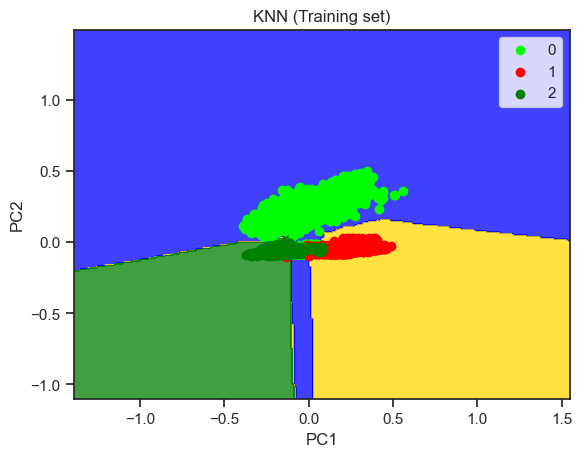

In [41]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn_model, metrics = knn_classification(X_train_pca, y_train, X_test_pca, y_test)
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
cmap = ListedColormap(('blue', 'gold', 'green'))
plt.contourf(X1, X2, knn_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
colors = ['lime', 'red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colors[i], label=j)
plt.title('KNN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [20]:
model_LR = MODEL_LOGISTIC_REGRESSION 
model_LR_M = MODEL_LOGISTIC_REGRESSION_MULTINOMIAL
model_NB = MODEL_NAIVE_BAYES
model_NB_M = MODEL_NAIVE_BAYES_MULTINOMIAL
model_knn = MODEL_KNN

with open('modelo_LR.pkl', 'wb') as file:
    pickle.dump((model_LR), file)

with open('modelo_LR_M.pkl', 'wb') as file:
    pickle.dump((model_LR_M), file)
    
with open('modelo_NB.pkl', 'wb') as file:
    pickle.dump((model_NB), file)
    
with open('modelo_NB_M.pkl', 'wb') as file:
    pickle.dump((model_NB_M), file) 
    
with open('modelo_knn.pkl', 'wb') as file:
    pickle.dump((model_knn), file) 